In [1]:
!pip install numpy
! pip install tensorflow
!pip install tqdm

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1: Training accuracy: 0.9470
Epoch 2: Training accuracy: 0.9612
Epoch 3: Training accuracy: 0.9647
Epoch 4: Training accuracy: 0.9686
Epoch 5: Training accuracy: 0.9687
Epoch 6: Training accuracy: 0.9697
Epoch 7: Training accuracy: 0.9705
Epoch 8: Training accuracy: 0.9710
Epoch 9: Training accuracy: 0.9730
Epoch 10: Training accuracy: 0.9727
Epoch 11: Training accuracy: 0.9729
Epoch 12: Training accuracy: 0.9745
Epoch 13: Training accuracy: 0.9757
Epoch 14: Training accuracy: 0.9750
Epoch 15: Training accuracy: 0.9758
Epoch 16: Training accuracy: 0.9762
Epoch 17: Training accuracy: 0.9775
Epoch 18: Training accuracy: 0.9762
Epoch 19: Training accuracy: 0.9774
Epoch 20: Training accuracy: 0.9773

Test Accuracy: 0.7250


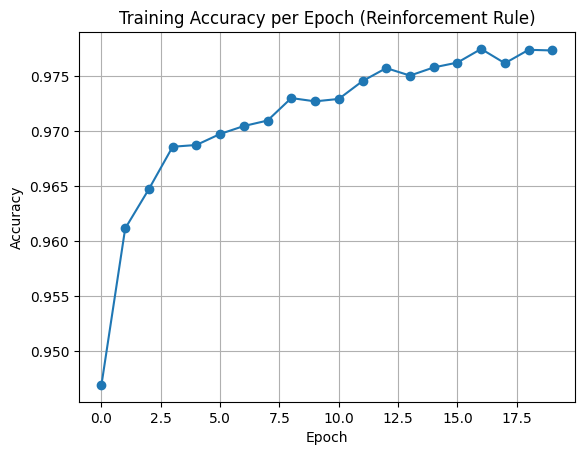

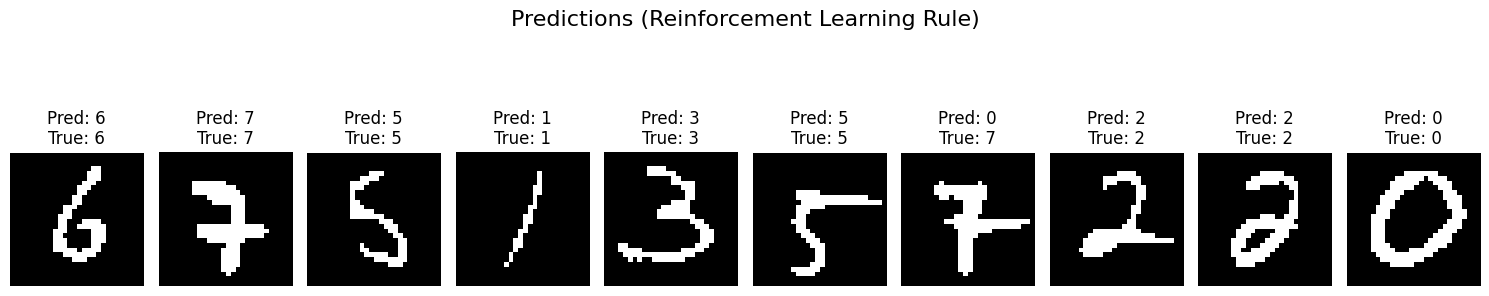

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# --- Параметры ---
input_size = 784
output_size = 10
theta = 0.5                # Порог активации
max_epochs = 20

# --- Подготовка данных ---
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Используем подмножество для быстрого обучения
x_train = x_train[:5000].reshape(-1, input_size) / 255.0
x_test = x_test[:1000].reshape(-1, input_size) / 255.0

# Бинаризуем входы (вместо градиентов — пороговая активация)
x_train = (x_train > 0.5).astype(int)
x_test = (x_test > 0.5).astype(int)

# Преобразуем метки в one-hot
y_train = to_categorical(y_train[:5000], output_size)
y_test = to_categorical(y_test[:1000], output_size)

# --- Инициализация весов и порогов ---
np.random.seed(42)
weights = np.random.uniform(-0.1, 0.1, (input_size, output_size))  # W[i][j]
bias = np.random.uniform(-0.1, 0.1, (output_size,))                # Порог чувствительности θ_j

# --- Обучение ---
history = []
for epoch in range(max_epochs):
    errors = 0

    for xi, target in zip(x_train, y_train):
        net = np.dot(xi, weights) - bias
        output = (net >= theta).astype(int)

        for j in range(output_size):
            if output[j] != target[j]:
                errors += 1
                if output[j] == 0:  # Подкрепление: должен быть 1 — увеличиваем веса активных входов
                    weights[:, j] += xi
                elif output[j] == 1:  # Наказание: должен быть 0 — уменьшаем веса активных входов
                    weights[:, j] -= xi

    accuracy = 1 - errors / len(x_train) / output_size
    history.append(accuracy)
    print(f"Epoch {epoch+1}: Training accuracy: {accuracy:.4f}")

    if errors == 0:
        print("Обучение завершено: ошибок нет.")
        break

# --- Тестирование ---
net_test = np.dot(x_test, weights) - bias
y_pred = (net_test >= theta).astype(int)
y_true = y_test

# Accuracy по наиболее вероятному классу
pred_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(y_true, axis=1)
test_accuracy = np.mean(pred_labels == true_labels)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# --- График точности по эпохам ---
plt.plot(history, marker='o')
plt.title("Training Accuracy per Epoch (Reinforcement Rule)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# --- Визуализация предсказаний на тесте ---
import random
indices = random.sample(range(len(x_test)), 10)

plt.figure(figsize=(15, 4))
for i, idx in enumerate(indices):
    img = x_test[idx].reshape(28, 28)
    pred = pred_labels[idx]
    true = true_labels[idx]

    plt.subplot(1, 10, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Pred: {pred}\nTrue: {true}")
    plt.axis("off")

plt.suptitle("Predictions (Reinforcement Learning Rule)", fontsize=16)
plt.tight_layout()
plt.show()